# 0.0. IMPORTS

In [1]:
import pandas         as pd
import numpy          as np
import seaborn        as sns
import plotly.express as px

from matplotlib            import pyplot as plt
from IPython.display       import Image
from IPython.core.display  import HTML

import inflection
import warnings

## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 20
    
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
    
warnings.filterwarnings( 'ignore' )
pd.options.display.float_format = '{:.2f}'.format

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [4]:
df_raw = pd.read_csv( 'data/kc_house_data.csv', low_memory=False )

In [5]:
df_raw.sample()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15
6891  3885803895  20150309T000000 763000.00         3       2.00         1360      8752    1.00           0     2          4      6        1360              0      1942             0    98033 47.69 -122.21           2530        7680

# 1.0. DATA DESCRIPTION

In [6]:
df1 = df_raw.copy()

## 1.1. Data Dimensions

In [7]:
print("Number of Rows {}".format(df1.shape[0]))
print("Number of Cols {}".format(df1.shape[1]))

Number of Rows 21613
Number of Cols 21


## 1.2. Data Types

In [8]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.3. Check NA

In [9]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4. Change Types

In [10]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.5. Change Types

In [11]:
df1['price'] = df1['price'].astype( int ) 

## 1.6. Descreptive Statistical

In [12]:
num_attributes = df1.drop( 'date', axis=1 )

In [13]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'] )

In [14]:
m

attributes        min           max         range          mean        median           std  skew  kurtosis
0              id 1000102.00 9900000190.00 9899000088.00 4580301520.86 3904930410.00 2876499023.43  0.24     -1.26
1           price   75000.00    7700000.00    7625000.00     540088.14     450000.00     367118.70  4.02     34.59
2        bedrooms       0.00         33.00         33.00          3.37          3.00          0.93  1.97     49.06
3       bathrooms       0.00          8.00          8.00          2.11          2.25          0.77  0.51      1.28
4     sqft_living     290.00      13540.00      13250.00       2079.90       1910.00        918.42  1.47      5.24
5        sqft_lot     520.00    1651359.00    1650839.00      15106.97       7618.00      41419.55 13.06    285.08
6          floors       1.00          3.50          2.50          1.49          1.50          0.54  0.62     -0.48
7      waterfront       0.00          1.00          1.00          0.01          0.00          0.09 11.39    127.63
8            view       0.00          4.00          4.00          0.23          0.00          0.77  3.40     10.89
9       condition       1.00          5.00          4.00          3.41          3.00          0.65  1.03      0.53
10          grade       1.00         13.00         12.00          7.66          7.00          1.18  0.77      1.19
11     sqft_above     290.00       9410.00       9120.00       1788.39       1560.00        828.07  1.45      3.40
12  sqft_basement       0.00       4820.00       4820.00        291.51          0.00        442.56  1.58      2.72
13       yr_built    1900.00       2015.00        115.00       1971.01       1975.00         29.37 -0.47     -0.66
14   yr_renovated       0.00       2015.00       2015.00         84.40          0.00        401.67  4.55     18.70
15        zipcode   98001.00      98199.00        198.00      98077.94      98065.00         53.50  0.41     -0.85
16            lat      47.16         47.78          0.62         47.56         47.57          0.14 -0.49     -0.68
17           long    -122.52       -121.31          1.20       -122.21       -122.23          0.14  0.89      1.05
18  sqft_living15     399.00       6210.00       5811.00       1986.55       1840.00        685.38  1.11      1.60
19     sqft_lot15     651.00     871200.00     870549.00      12768.46       7620.00      27303.55  9.51    150.76

In [15]:
df1['date'].min()

Timestamp('2014-05-02 00:00:00')

In [16]:
df1['date'].max()

Timestamp('2015-05-27 00:00:00')

# 2.0.  FEATURE ENGINEERING

In [17]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses

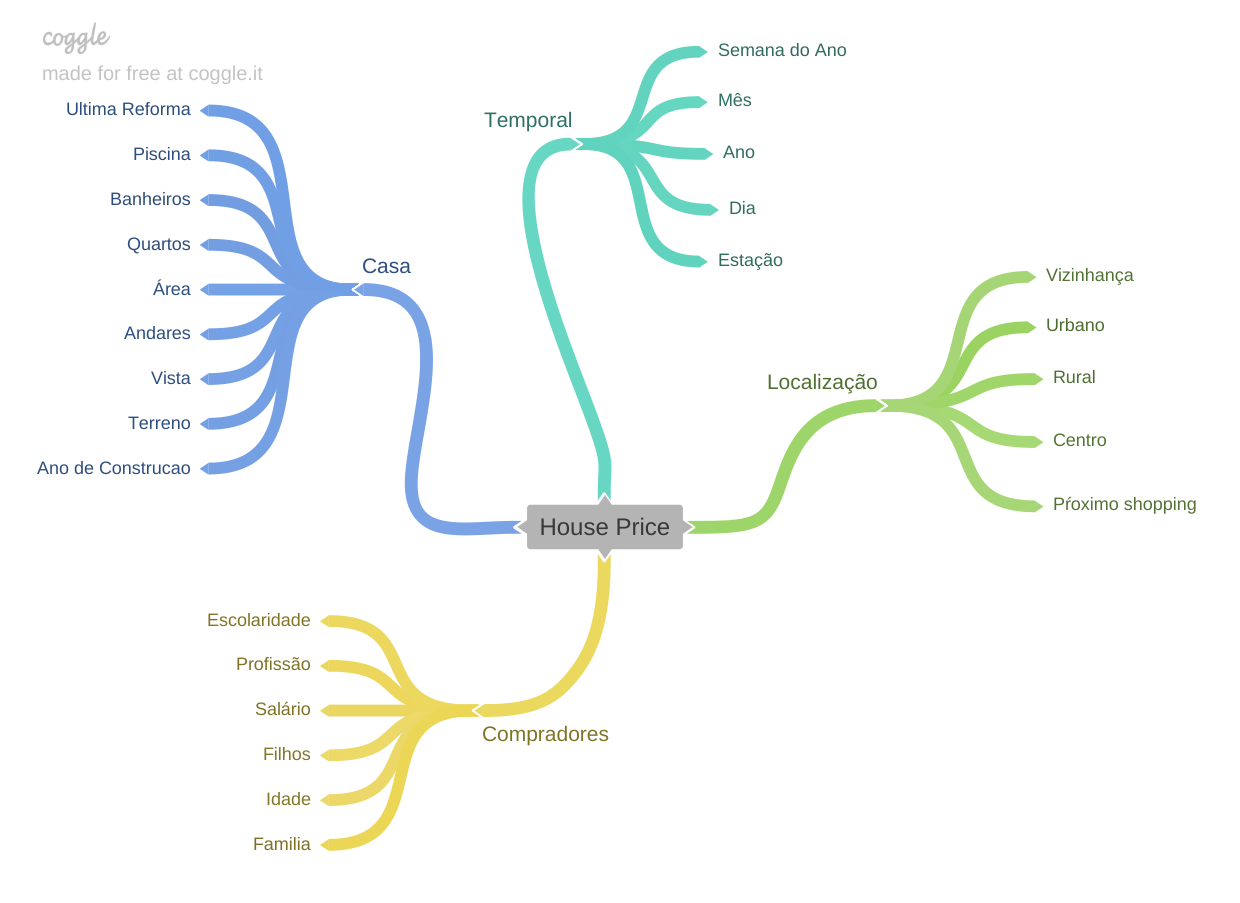

In [18]:
Image( 'image/House_Price.png' )

## 2.2. Criacao de Hipoteses

In [19]:
df1.sample()

id       date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15
16903  4046710050 2014-08-27  470000         4       2.00         2180     17180    2.00           0     0          4      7        2180              0      1977             0    98014 47.70 -121.92           1880       14043

### 2.2.4. Lista de Hipoteses

#### 1. Imóveis construídos nos ultimos 20 anos possuem mais andares.

#### 2. Imóveis com vista para a água custam em média 100% a mais.

#### 3. Imóveis com melhor vista deveriam ter o preço maior.

#### 4. Imóveis construidos nos últimos 10 anos deveriam estar em melhores condições.

#### 5. Imóveis construidos nas ultimas decadas deixaram de ter porão. 

#### 6. Imóveis que possuem porão deveriam ser em média 20% mais caras. 

#### 7. Imóveis reformados custam em média 35% a mais.

#### 8. Imóveis Contruidos nos ultimos 20 anos tem qualidade superior.

#### 9. Em imóveis contruídos recentemente, a área do imóvel aumentou em relação a do terreno. 

#### 10. O preço médio dos imóveis é  maior nno verão.

## 2.3. Feature Engineering 

In [20]:
# Ano
df2['year'] = df2['date'].dt.year

# Mes
df2['month'] = df2['date'].dt.month

# Dia
df2['day'] = df2['date'].dt.day

# Semana do Ano
df2['week_of_year'] = df2['date'].dt.weekofyear

# Estação
df2['season'] = df2['month'].apply( lambda x: 'winter' if x in [12, 1 ,2] else 'spring' if x in [3, 4, 5] else 'summer' if x in [6, 7, 8] else 'autumn' )

# Possui Porão
df2['basement'] = df2['sqft_basement'].apply( lambda x: 1 if x > 0 else 0 )

# Área da base
df2['sqft_base'] = ( df2['sqft_above']  / df2['floors'] )

# Andares
df2['floors_num'] = df2['floors'].apply( lambda x: 'one' if x == 1 else 'more' )

# Antes e depois do dia 15
df2['before_after'] = df2['day'].apply( lambda x: 'before_15' if x <= 15 else 'after_15' )

# Foi reformada
df2['renovated'] = df2['yr_renovated'].apply( lambda x: 1 if x > 0 else 0 )

# Area da casa em relação ao terreno %
df2['living_lot'] =  ( df2['sqft_base'] / df2['sqft_lot'] ) * 100

# Preço por metro quadrado
df2['price_m2'] = ( df2['price'] / df2['sqft_lot'] )


In [21]:
df2.sample()

id       date   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  year  month  day  week_of_year  season  basement  sqft_base floors_num before_after  renovated  living_lot  price_m2
6918  3908100020 2014-08-03  540000         4       1.00         1360      5766    1.50           0     0          5      7        1360              0      1951             0    98115 47.68 -122.29           1500        5704  2014      8    3            31  summer         0     906.67       more    before_15          0       15.72     93.65

# 3.0. ANALISE EXPLORATORIA DE DADOS

In [22]:
df3 = df2.copy()

## 3.1. Analise Univariada

### 3.1.1. Response Variable

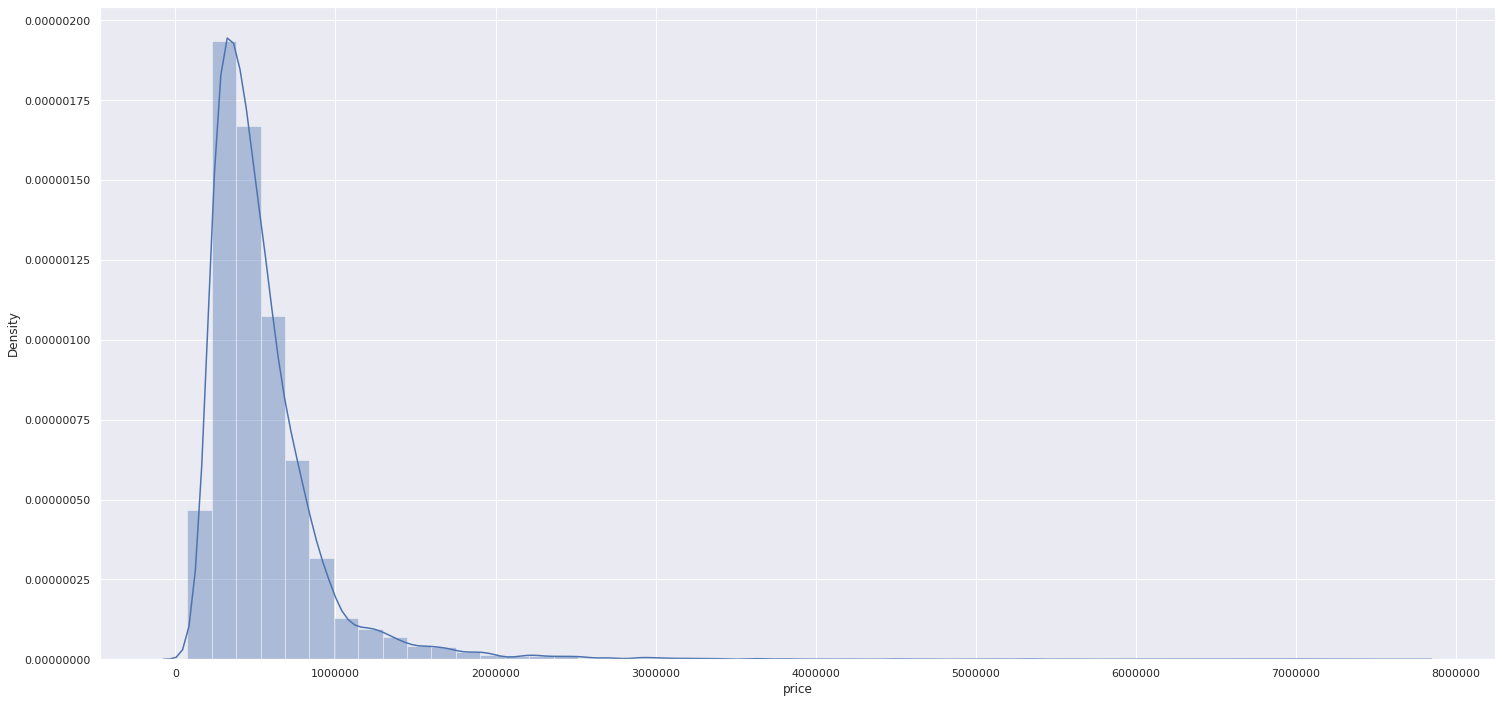

In [23]:
sns.distplot( df3['price'] );
plt.ticklabel_format( style='plain', axis='both' )

### 3.1.2 Numerical Variable 

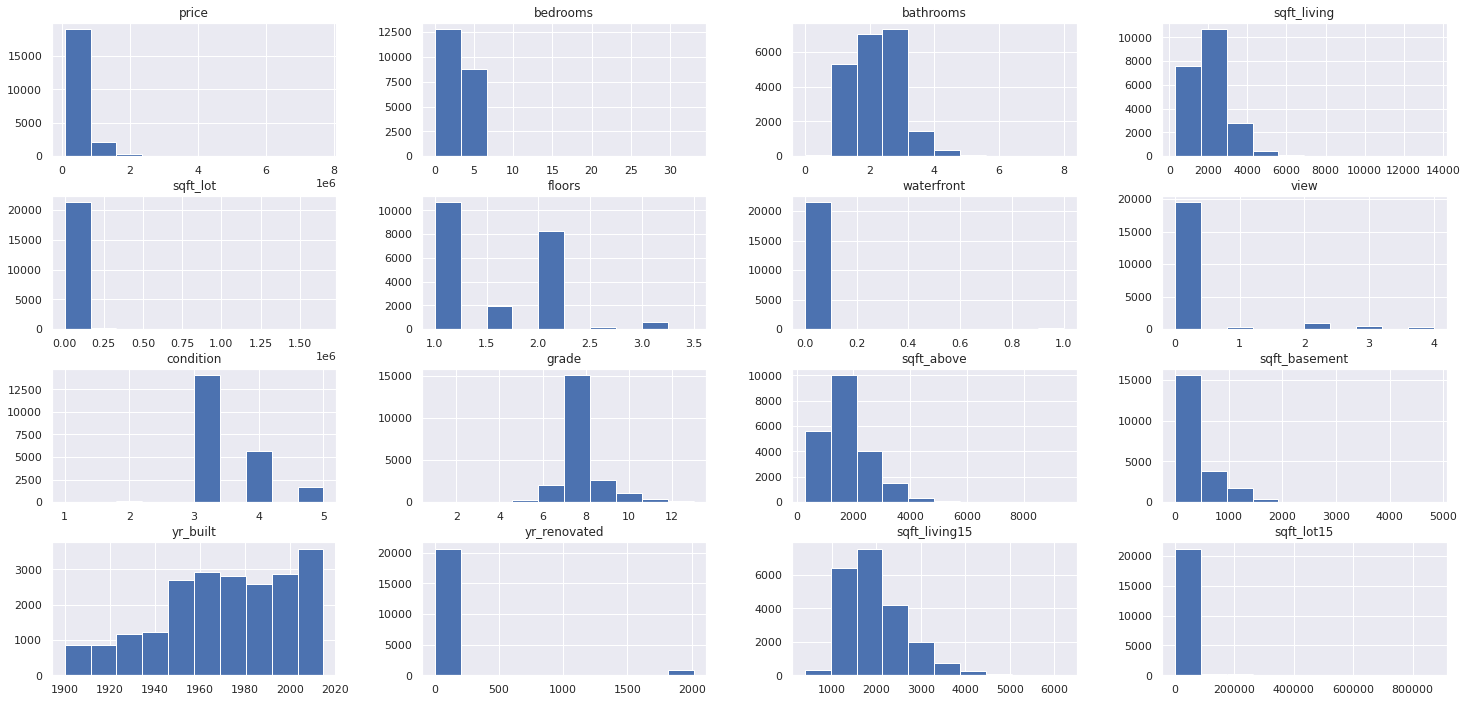

In [24]:
num_attributes.drop(['id', 'lat', 'long', 'zipcode'], axis=1).hist()
plt.show()

## 3.2. Analise Bivariada

### H1. Imóveis construídos nos ultimos 20 anos possuem mais andares.
**Verdadeiro** Imóveis construídos nos últimos 20 anos possuem mais andares.

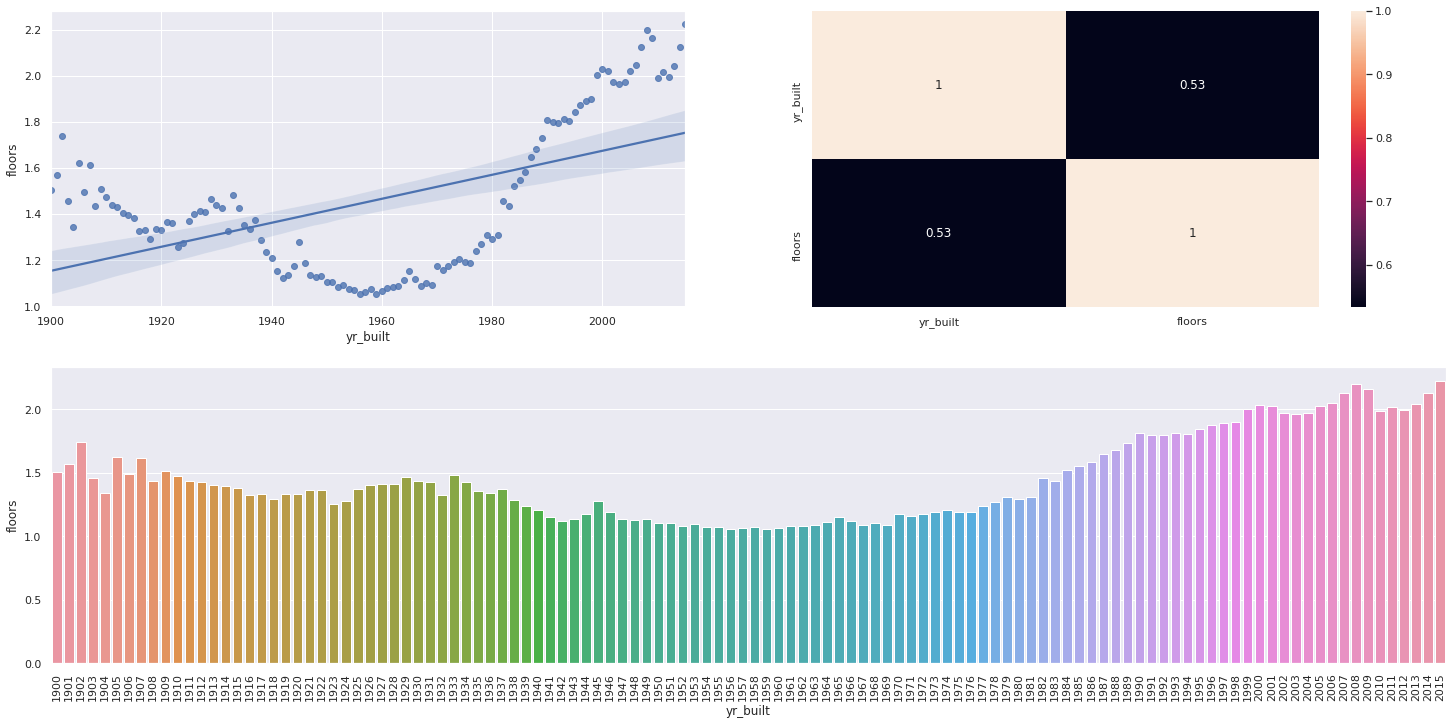

In [25]:
aux1 = df3[['floors', 'yr_built']].groupby( 'yr_built' ).mean().reset_index()


grid = GridSpec( 2, 2 )

plt.subplot( grid[1,:] )
sns.barplot( x='yr_built', y='floors', data=aux1 );
plt.xticks( rotation=90 );


plt.subplot( grid[0,0] )
sns.regplot( x='yr_built', y='floors', data=aux1 );


plt.subplot( grid[0,1] )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );


### H2. Imóveis com vista para a água custam em média 50% a mais.
**Falso** Imóveis com vista para aguá custam em média 300% a mais.

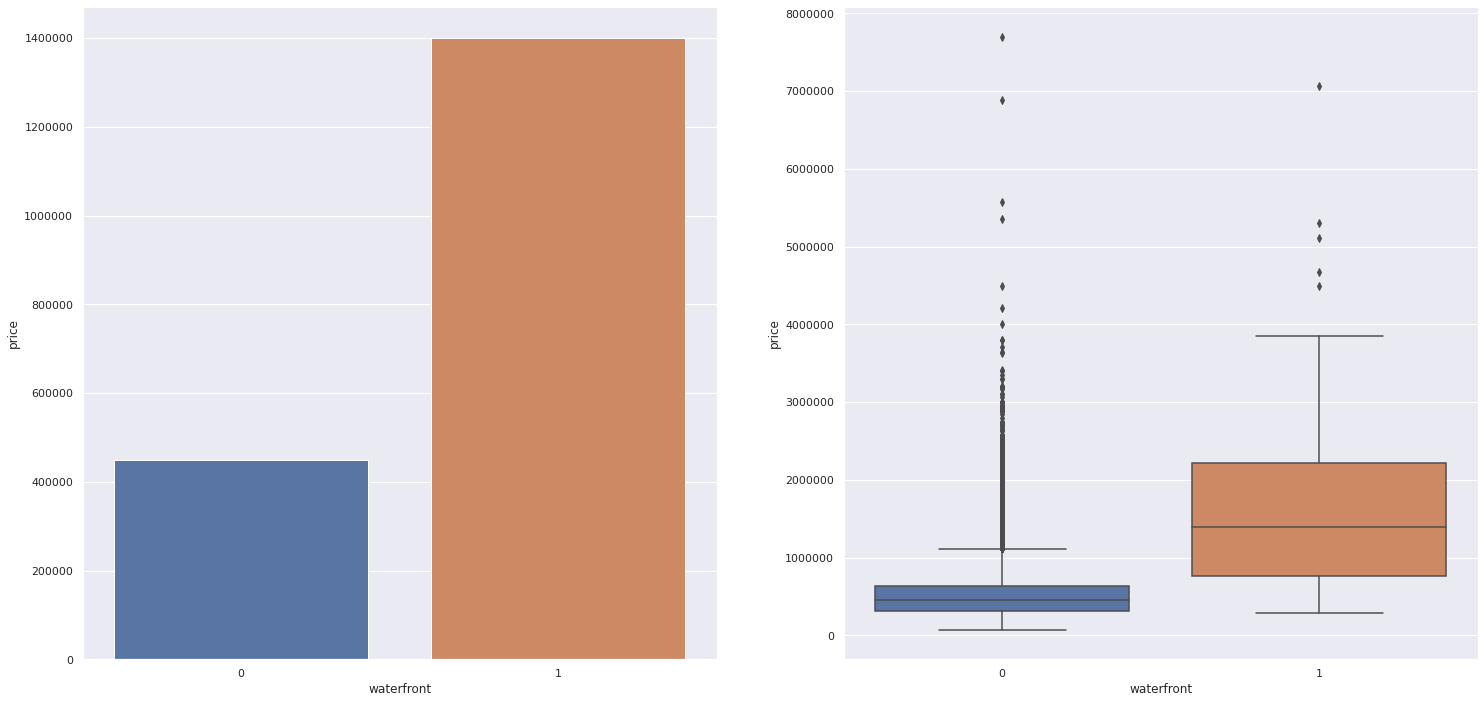

In [26]:
aux1 = df3[['price', 'waterfront']].groupby( 'waterfront' ).median().reset_index()

plt.subplot(1, 2, 1)
sns.barplot( x='waterfront', y='price', data=aux1);
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1, 2, 2)
sns.boxplot( x='waterfront', y='price', data=df3 );
plt.ticklabel_format(style='plain', axis='y')

In [27]:
houses = df2[['id', 'lat', 'long', 'price']]

fig = px.scatter_mapbox( houses,
                         lat = 'lat',
                         lon = 'long',
                         size = 'price',
                         color_continuous_scale = px.colors.cyclical.IceFire,
                         size_max=15,
                         zoom=10 )

fig.update_layout( mapbox_style = 'open-street-map' )
fig.update_layout( height=900, margin={ 'r': 0, 't': 0, 'l': 0, 'b': 0 } )
fig.show();

### H3. Imóveis com uma vista melhor deveriam ser mais caros.
**Verdadeiro** O atributo vista impacta diretamente no valor do imóvel.

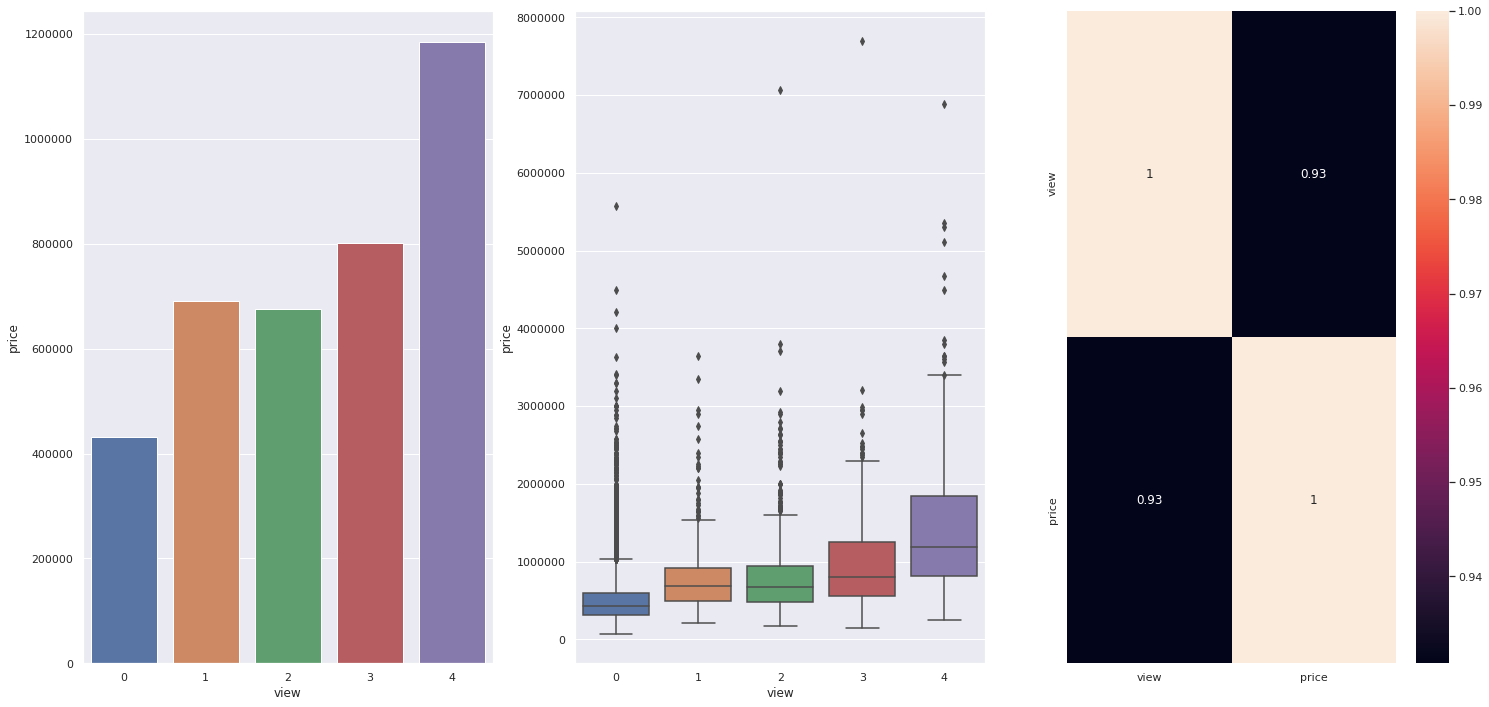

In [28]:
aux1 = df3[['price', 'view']].groupby( 'view' ).median().reset_index()
axu2 = df3[['id', 'view']].groupby( 'view' ).count().reset_index()

plt.subplot(1, 3, 1)
sns.barplot( x='view', y='price', data=aux1);
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1, 3, 2)
sns.boxplot( x='view', y='price', data=df3 );
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1, 3, 3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### H4. Imóveis construidos nos últimos anos deveriam estar em melhores condições.
**Falso** Imóveis contruídos nos ultimos 25 anos estão em condições inferiores.

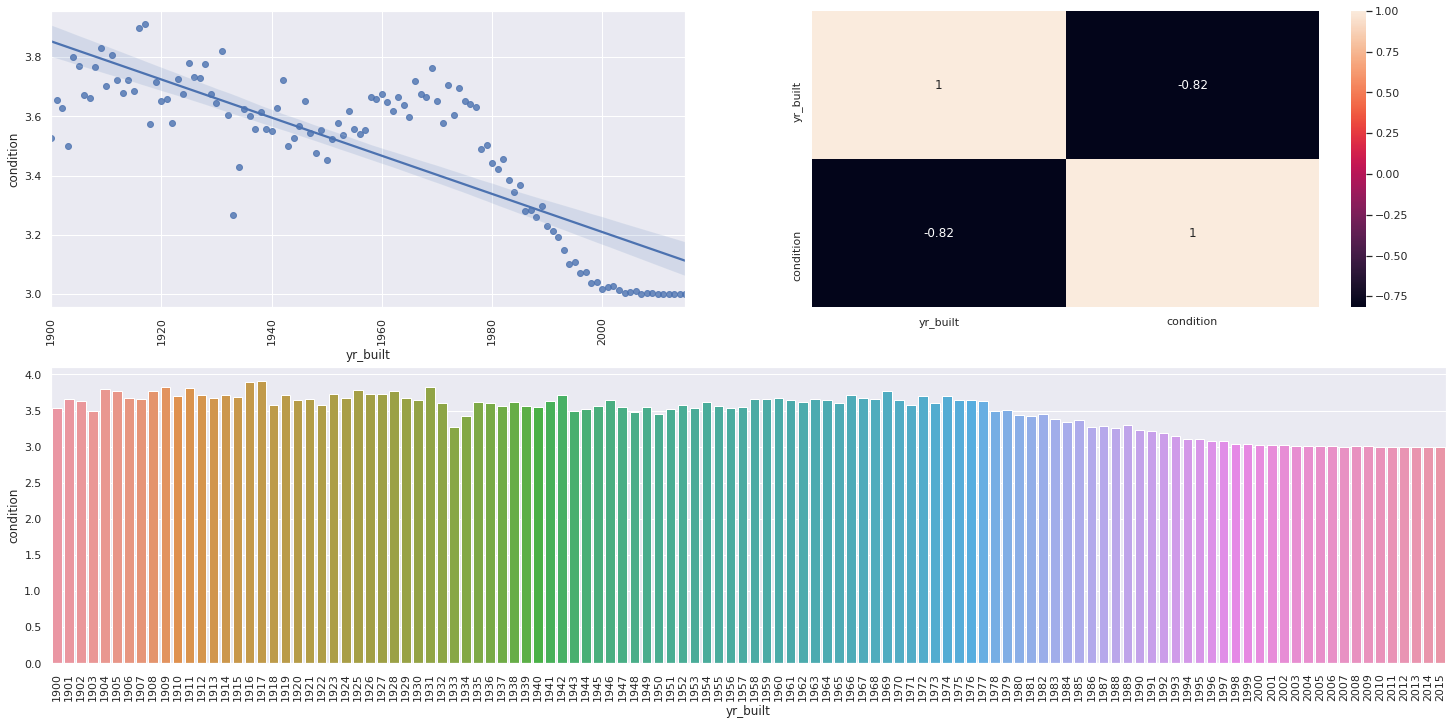

In [29]:
aux1 = df3[['condition','yr_built']].groupby('yr_built').mean().reset_index()


grid = GridSpec( 2, 2 )

plt.subplot( grid[0,0] )
sns.regplot( x='yr_built', y='condition', data=aux1 );
plt.xticks( rotation=90 );


plt.subplot( grid[0,1] )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );


plt.subplot( grid[1,:] )
sns.barplot( x='yr_built', y='condition', data=aux1 );
plt.xticks( rotation=90 );

### H5. Imóveis construidos nas ultimas decadas deixaram de ter porão.
**Verdadeiro** O número de imóveis, construidos nos últimos 20 anos, que não possuem porão aumentou.

<AxesSubplot:xlabel='yr_built'>

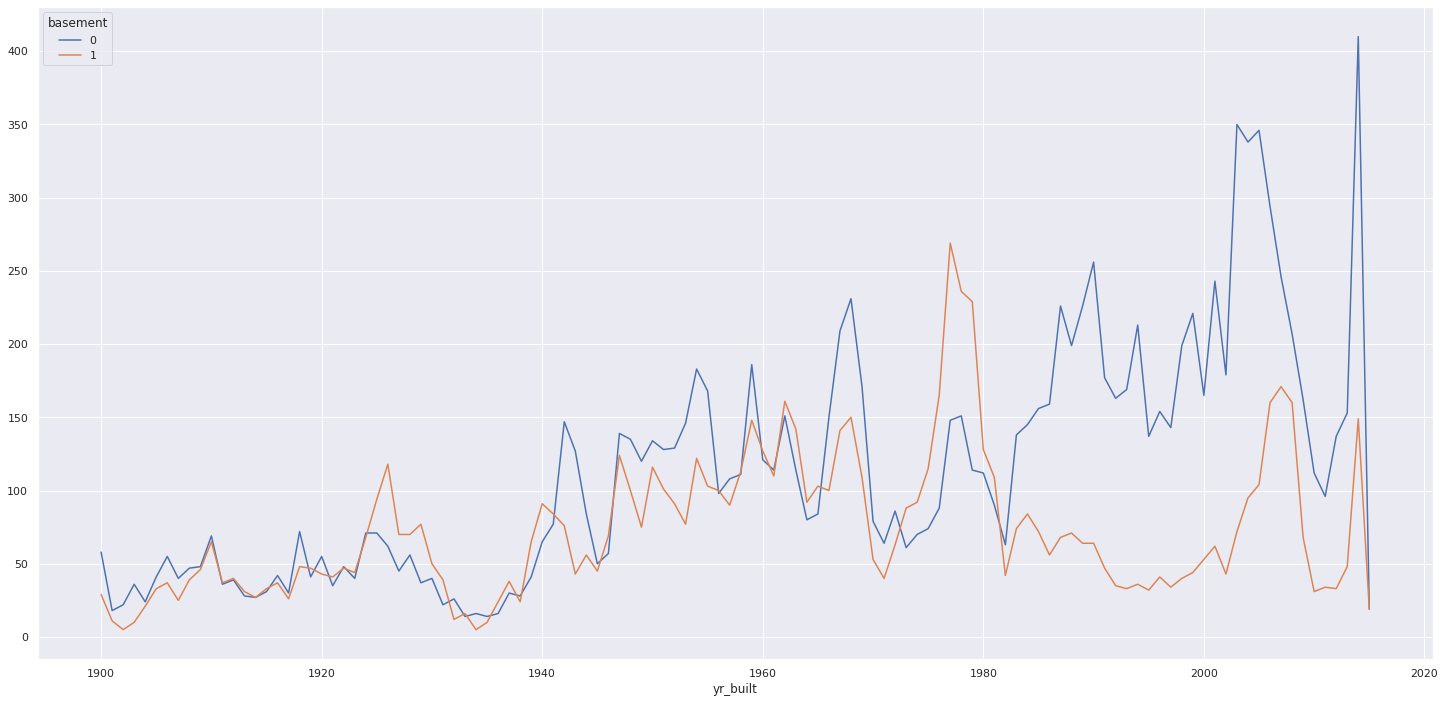

In [30]:
aux1 = df3[['id','basement', 'yr_built']].groupby( ['basement', 'yr_built'] ).count().reset_index()

aux1.pivot( index='yr_built', columns='basement', values='id' ).plot()


### H6. Imóveis que possuem porão são em média 20% mais caros.
**Verdadeiro** O preço dos imóveis que possuem porão é em média 25% maior.

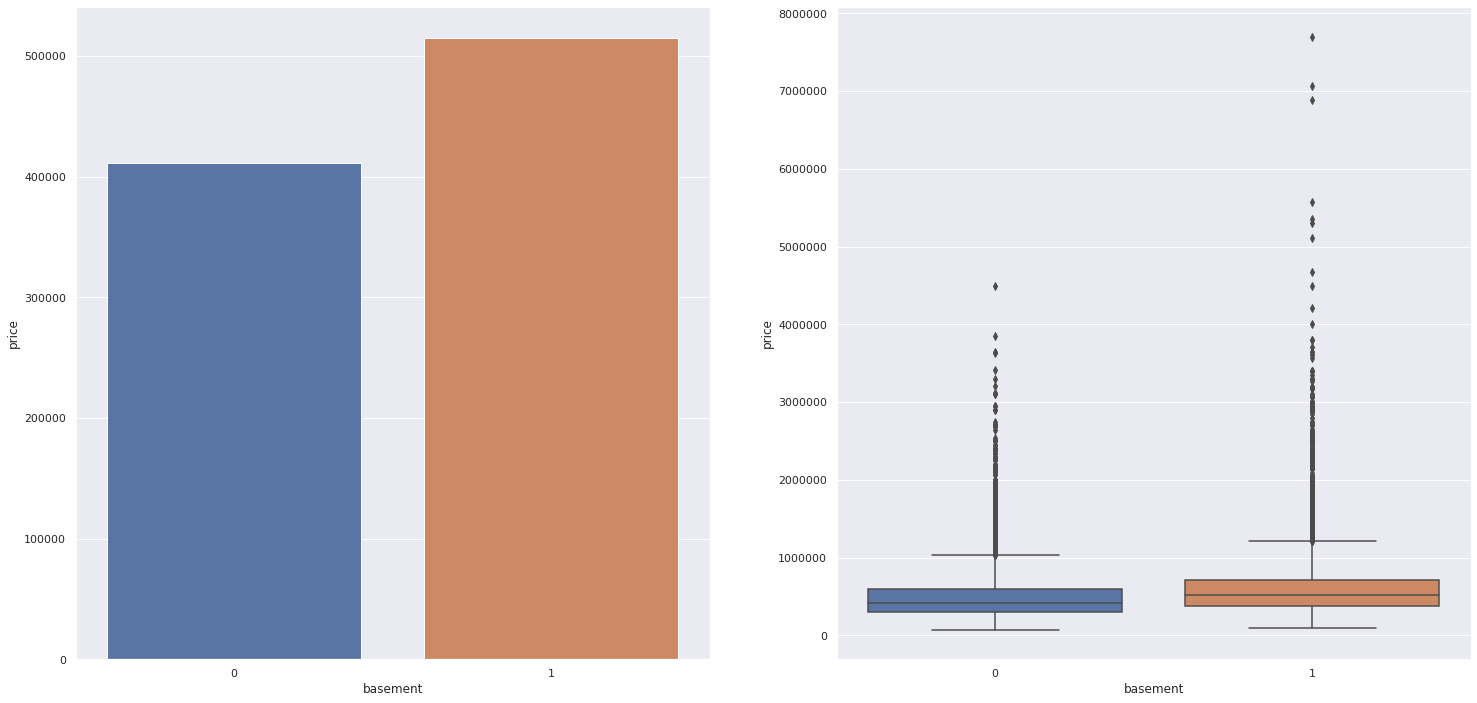

In [31]:
aux1 = df3[['price','basement']].groupby( 'basement' ).median().reset_index()

plt.subplot(1, 2, 1)
sns.barplot( x='basement', y='price', data=aux1 );

plt.subplot(1, 2, 2)
sns.boxplot( x='basement', y='price', data=df3 );
plt.ticklabel_format(style='plain', axis='y')


### H7. Imóveis reformados custam em média 35% a mais.
**Verdadeiro** Imóveis que foram reformados são em média 35% mais caros.

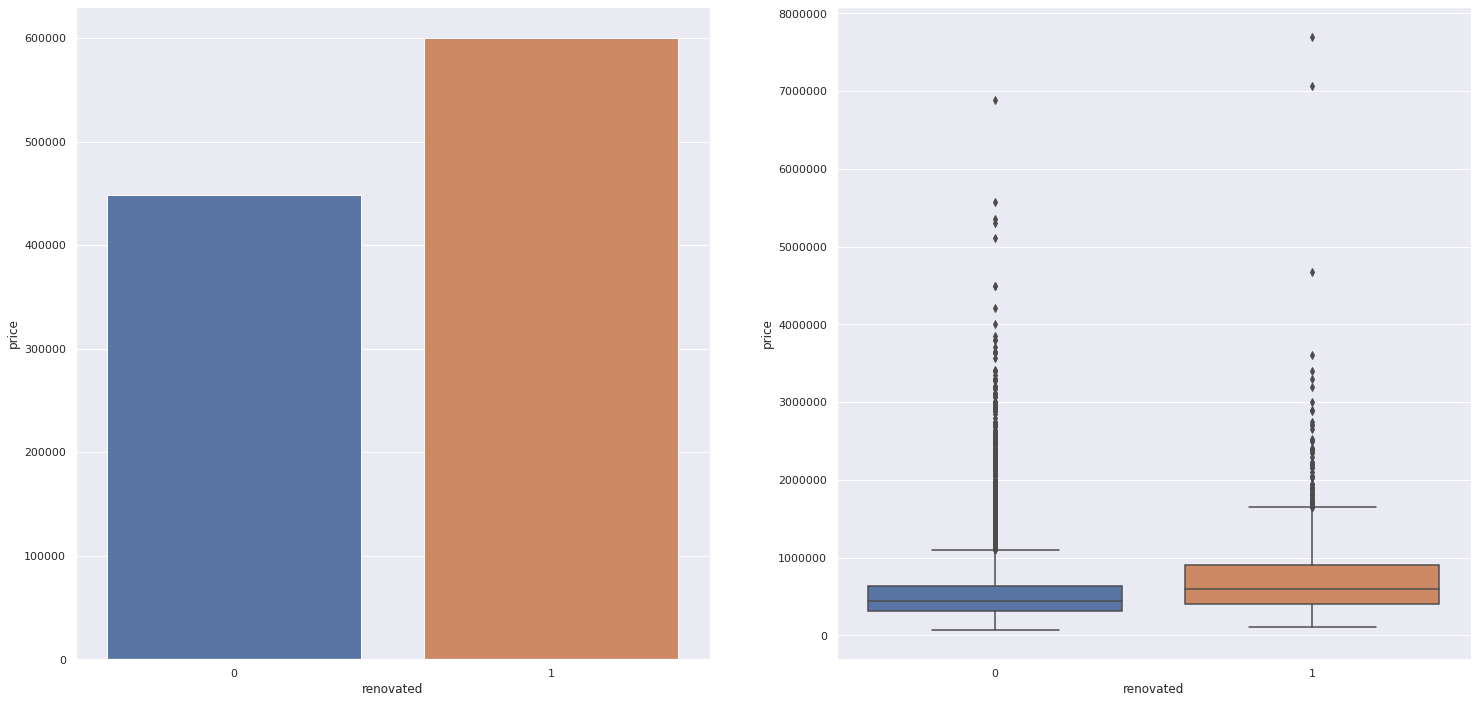

In [32]:
aux1 = df3[['price', 'renovated']].groupby( 'renovated' ).median().reset_index()

plt.subplot(1, 2, 1)
sns.barplot( x='renovated', y='price', data=aux1);
plt.ticklabel_format( style='plain', axis='y' )

plt.subplot(1, 2, 2)
sns.boxplot( x='renovated', y='price', data=df3 );
plt.ticklabel_format(style='plain', axis='y')

### H8. Imóveis Contruidos nos ultimos 20 anos tem qualidade superior.
**Verdadeiro** Imóveis construidos recentemente tem uma graduação superior.

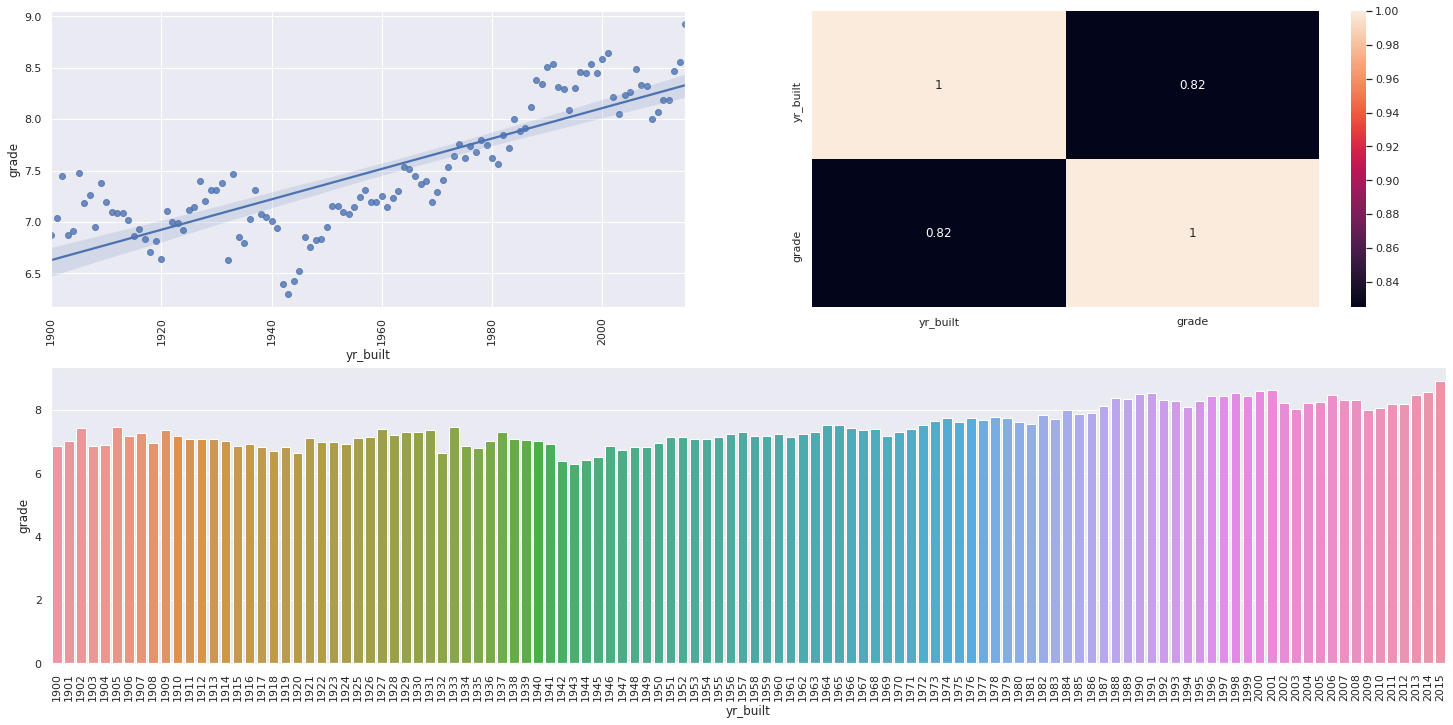

In [33]:
aux1 = df3[['grade','yr_built']].groupby('yr_built').mean().reset_index()


grid = GridSpec( 2, 2 )

plt.subplot( grid[0,0] )
sns.regplot( x='yr_built', y='grade', data=aux1 );
plt.xticks( rotation=90 );


plt.subplot( grid[0,1] )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );


plt.subplot( grid[1,:] )
sns.barplot( x='yr_built', y='grade', data=aux1 );
plt.xticks( rotation=90 );
plt.ticklabel_format( style='plain', axis='y' );

### H9. Em imóveis contruídos recentemente, a área do imóvel aumentou em relação a do terreno.
**Verdadeiro** Nos últimos 15 anos a área interna da casa aumentou em relação a área total do terreno.

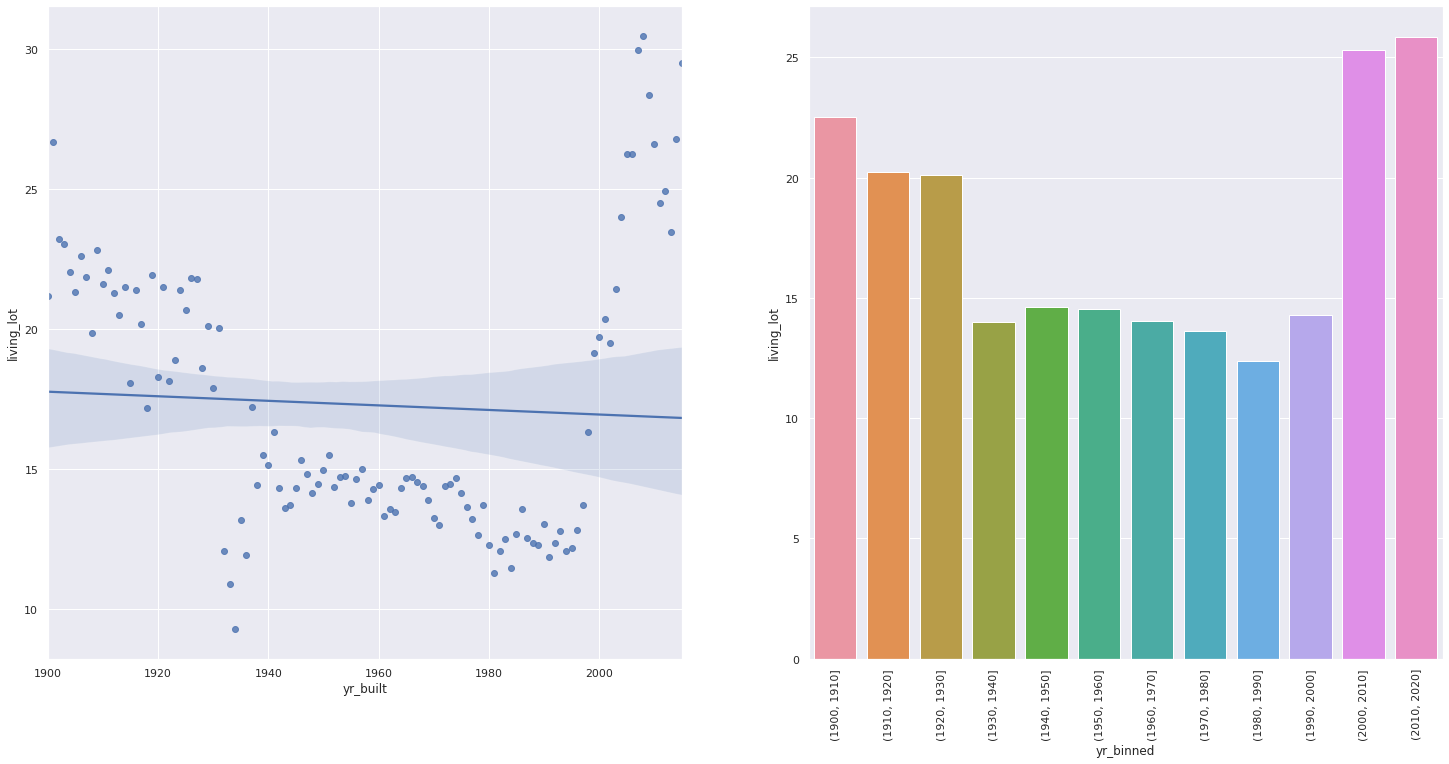

In [61]:
aux1 = df3[['living_lot','yr_built']].groupby('yr_built').median().reset_index()


plt.subplot( 1, 2, 1 )
sns.regplot( x='yr_built', y='living_lot', data=aux1 );


plt.subplot( 1, 2, 2 )
bins = list( np.arange(1900, 2021, 10 ) )
aux1['yr_binned'] = pd.cut( aux1['yr_built'], bins=bins )
aux2 = aux1[['yr_binned','living_lot']].groupby( 'yr_binned' ).mean().reset_index()
sns.barplot( x='yr_binned', y='living_lot', data=aux2 );
plt.xticks( rotation=90);

### H10. O preço médio dos imóveis é maior no verão.
**Falso** O preço médio dos imóveis é maior na primavera.

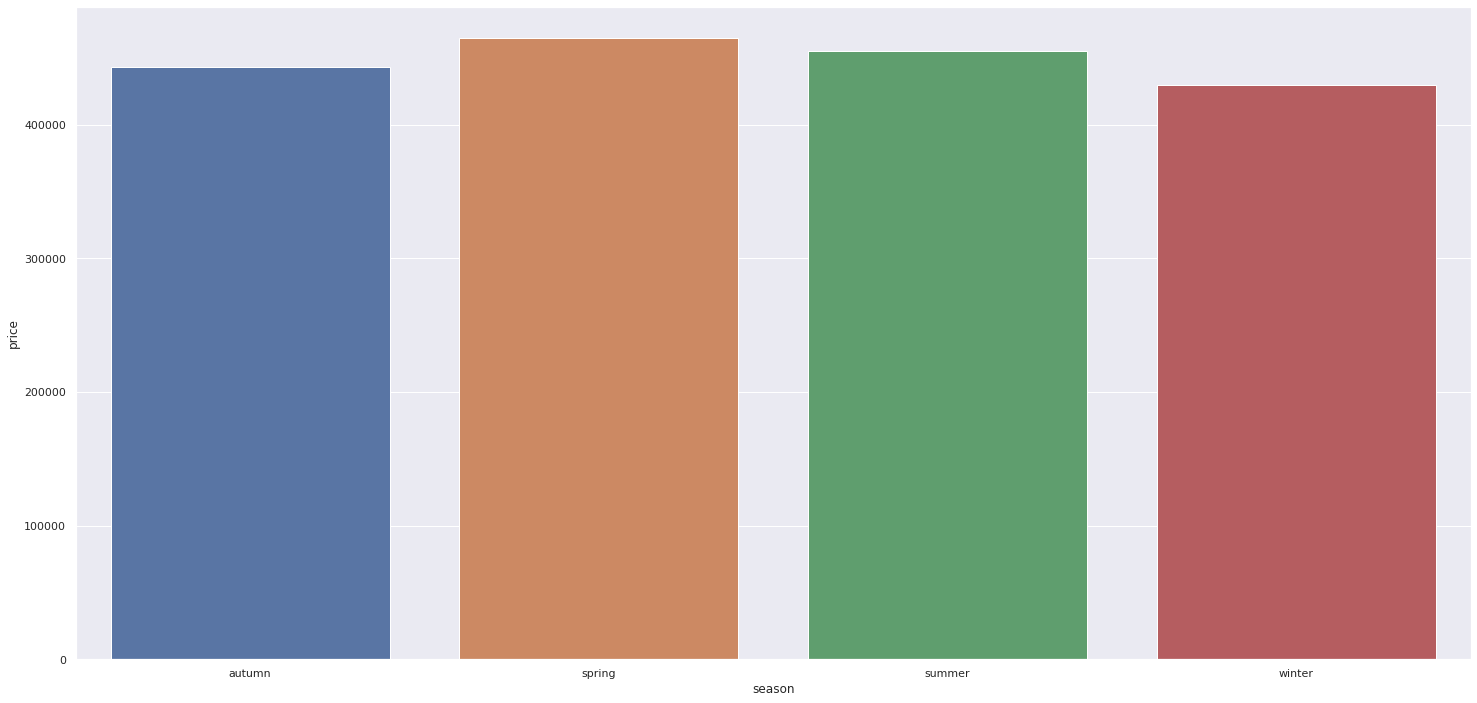

In [34]:
aux1 = df3[['price', 'season']].groupby('season').median().reset_index()

sns.barplot( x='season', y='price', data=aux1);
plt.ticklabel_format( style='plain', axis='y')

In [35]:
aux1.head().sort_values('price', ascending=False)

season   price
1  spring  465000
2  summer  455000
0  autumn  443000
3  winter  430000

## 3.2. Analise Multivariada

### Correlagrama

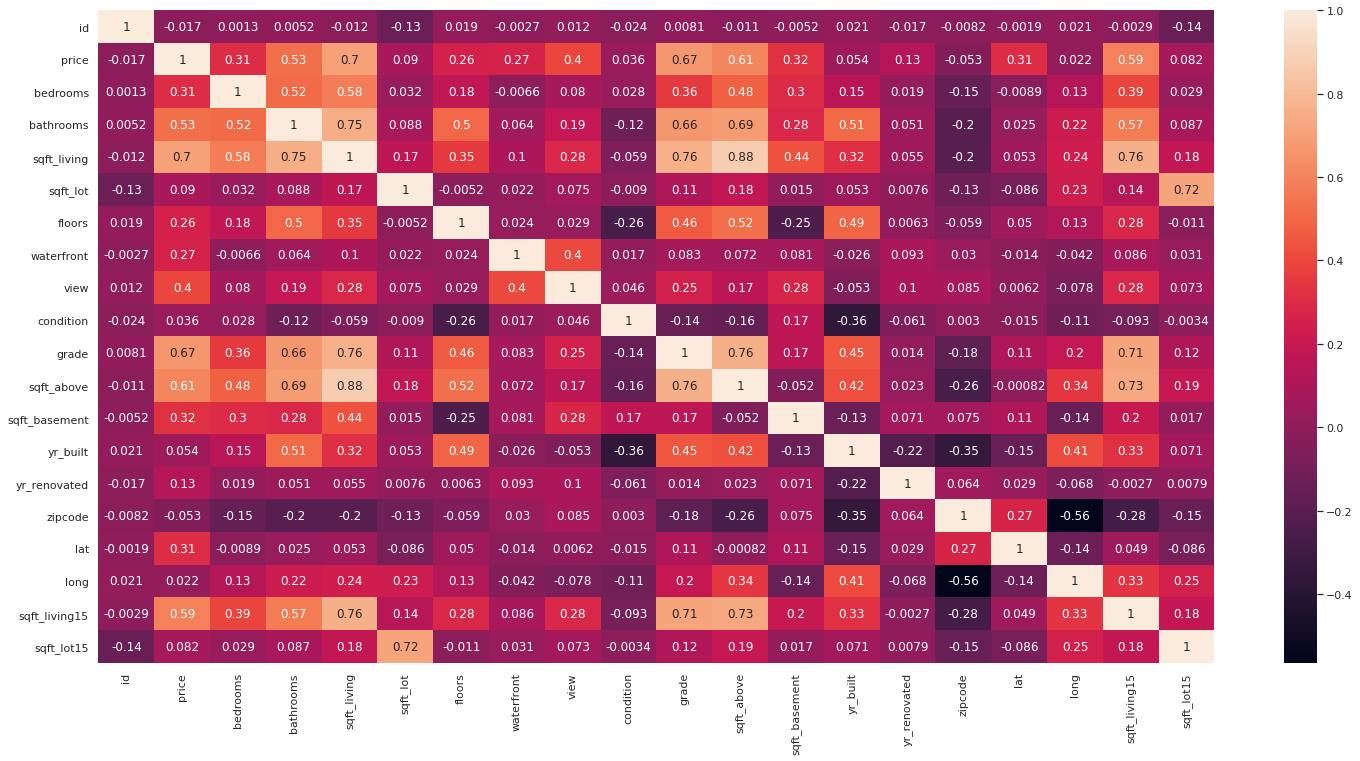

In [38]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True);

# 4.0. SOLUÇÃO DE NEGOCIOS

## 1 - Quais os imóveis que a empresa deveria comprar e por qual preço?
Imóveis que estão abaixo da mediana de preços por região e em boas condições.

In [39]:
df4 = df3.copy()

In [40]:
aux0 = df4[['sqft_lot', 'zipcode']].groupby('zipcode').median().reset_index()

In [41]:
aux1 = aux1 = df4[['price', 'zipcode']].groupby( 'zipcode' ).median().reset_index()

In [42]:
aux0 = pd.merge( aux1, aux0, how='left', on='zipcode')

In [43]:
# Preço por metro quadrado
aux0['median_p_m2'] = ( aux0['price'] / aux0['sqft_lot'] )


In [44]:
aux0 = aux0.drop(['price', 'sqft_lot'], axis=1)

In [45]:
aux1 = df4[['id','price', 'condition', 'grade', 'zipcode', 'season', 'price_m2']]

In [46]:
aux1.head()

id   price  condition  grade  zipcode  season  price_m2
0  7129300520  221900          3      7    98178  autumn     39.27
1  6414100192  538000          3      7    98125  winter     74.29
2  5631500400  180000          3      6    98028  winter     18.00
3  2487200875  604000          5      7    98136  winter    120.80
4  1954400510  510000          3      8    98074  winter     63.12

In [47]:
purchase = pd.merge( aux1, aux0, how='left', on='zipcode' )

In [48]:
purchase.head()

id   price  condition  grade  zipcode  season  price_m2  median_p_m2
0  7129300520  221900          3      7    98178  autumn     39.27        38.65
1  6414100192  538000          3      7    98125  winter     74.29        56.67
2  5631500400  180000          3      6    98028  winter     18.00        45.19
3  2487200875  604000          5      7    98136  winter    120.80        89.73
4  1954400510  510000          3      8    98074  winter     63.12        64.12

In [49]:
purchase['valor'] = purchase['median_p_m2'] - purchase['price_m2']

In [50]:
purchase['compra'] = purchase.apply( lambda x: 'nao comprar' if x['valor'] < 0 else 'nao comprar' if x['condition'] < 3 else 'nao comprar' if x['grade'] < 7 else 'comprar', axis = 1)

In [51]:
aux3 = purchase[['id', 'compra']].groupby('compra').count().reset_index()
aux3

compra     id
0      comprar   8922
1  nao comprar  12691

## 2 - Após a aquisição, qual o melhor momento para vende-lo e por qual preço?
Deveriam ser compradas no inverno onde menos casas são vendidas e os preços são menores e deveriam ser vendidas na primavera onde existe maior demanda e os preços são maiores

In [52]:
purchase = purchase[purchase['compra'] == 'comprar']

In [53]:
purchase['sale'] = purchase.apply( lambda x: ( x['price'] * 1.3 ) if x['season'] == 'spring' else ( x['price'] * 1.25 ) if x['season'] == 'summer' \
else ( x['price'] * 1.15 ) if x['season'] == 'autumn' else ( x['price'] * 1.1) , axis = 1 )

In [54]:
purchase.head()

id    price  condition  grade  zipcode  season  price_m2  median_p_m2  valor   compra       sale
4  1954400510   510000          3      8    98074  winter     63.12        64.12   1.00  comprar  561000.00
5  7237550310  1225000          3     11    98053  spring     12.02        74.08  62.06  comprar 1592500.00
7  2008000270   291850          3      7    98198  winter     30.05        30.85   0.80  comprar  321035.00
8  2414600126   229500          3      7    98146  spring     30.72        37.65   6.93  comprar  298350.00
9  3793500160   323000          3      7    98038  spring     49.24        49.53   0.30  comprar  419900.00

In [55]:
purchase['profit'] = (purchase['sale'] - purchase['price'])

In [56]:
purchase.head()

id    price  condition  grade  zipcode  season  price_m2  median_p_m2  valor   compra       sale    profit
4  1954400510   510000          3      8    98074  winter     63.12        64.12   1.00  comprar  561000.00  51000.00
5  7237550310  1225000          3     11    98053  spring     12.02        74.08  62.06  comprar 1592500.00 367500.00
7  2008000270   291850          3      7    98198  winter     30.05        30.85   0.80  comprar  321035.00  29185.00
8  2414600126   229500          3      7    98146  spring     30.72        37.65   6.93  comprar  298350.00  68850.00
9  3793500160   323000          3      7    98038  spring     49.24        49.53   0.30  comprar  419900.00  96900.00

## 3 - A House Mart deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças?
Deveriam ser feitas reformas para melhorar as condições da casa e que o valor de custo seja até 5% do valor do imóvel.

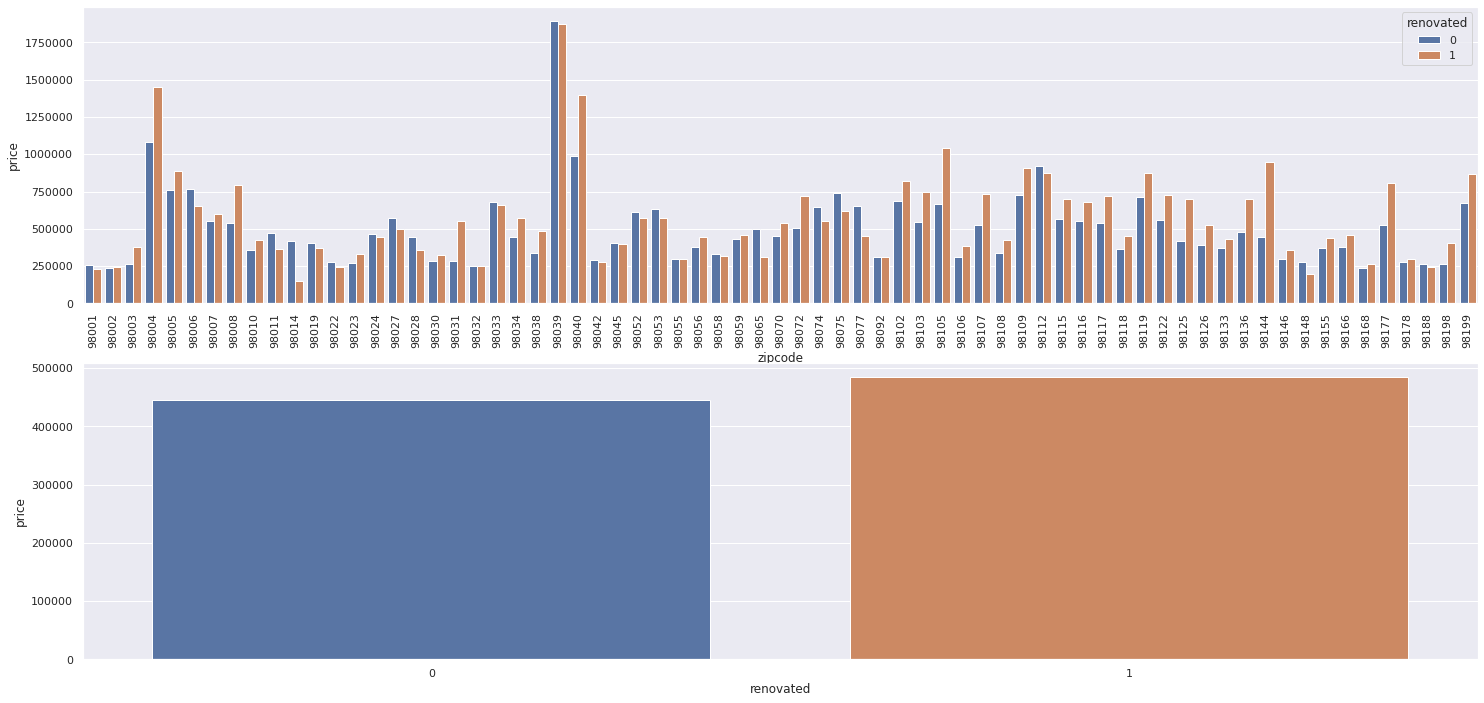

In [57]:
aux0 = df3[df3['zipcode'] !=98029]
aux1 = aux0[['price','zipcode','renovated']].groupby( ['zipcode', 'renovated'] ).median().reset_index()

plt.subplot(2 ,1, 1)
sns.barplot( x='zipcode', y='price', hue='renovated', data=aux1 )
plt.xticks( rotation=90 )
plt.ticklabel_format( style='plain', axis='y' )

plt.subplot(2 ,1, 2)
aux2 = aux1[['price', 'renovated']].groupby( 'renovated' ).median().reset_index()
sns.barplot( x='renovated', y='price', data=aux2 )
plt.ticklabel_format( style='plain', axis='y' )

In [58]:
print(f" Imóveis reformados tem uma valorização média de {( ( ( aux2['price'][1] / aux2['price'][0] ) - 1 ) * 100 ).round(2)}%" )

 Imóveis reformados tem uma valorização média de 8.77%
